# 4.10 - Additional Queries

##### Importing Data and Libraries

##### Checking for Price Ranges

##### Frequency of Departments

##### Customer Loyalty Pie Chart

##### Loyalty vs Departments

### Importing Data and Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Importing data
path = r'C:\Users\arafo\CareerFoundry\Instacart Basket Analysis'
final_dataset = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '01-2023_final_dataset.pkl'))

In [3]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
final_dataset.head(15)

,order_id,user_id,order_number,order_days_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spender_flag,median_days_since_prior_order,frequency_flag,first_name,last_name,gender,state,age,date_joined,num_of_dependents,marital_status,income,region,activity_flag,age_group,income_profile,department,family_profile,family_size
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages,Older Children,Large Family
1,2398795,1,2,3,7,15.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest Day,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages,Older Children,Large Family
2,473747,1,3,3,12,21.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Slowest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages,Older Children,Large Family
3,2254736,1,4,4,7,29.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Day,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages,Older Children,Large Family
4,431534,1,5,4,15,28.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages,Older Children,Large Family
5,3367565,1,6,2,7,19.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages,Older Children,Large Family
6,550135,1,7,1,9,20.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages,Older Children,Large Family
7,3108588,1,8,1,14,14.0,False,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages,Older Children,Large Family
8,2295261,1,9,1,16,0.0,False,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest Day,Most Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages,Older Children,Large Family
9,2550362,1,10,4,8,30.0,False,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Slowest Day,Average Orders,10,New customer,6.367797,Low spender,20.5,Non-frequent Customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,South,High Activity,Adult,Low Income,beverages,Older Children,Large Family


### Checking for Price Ranges

In [5]:
final_dataset['price_range_loc'].value_counts(dropna = False)

Mid-range product     20357406
Low-range product      9427297
High-range product      386721
Name: price_range_loc, dtype: int64

In [6]:
# Crosstab to depict price ranges compared to departments

In [7]:
ct_department_priceranges = pd.crosstab(final_dataset['department'], final_dataset['price_range_loc'], dropna = False)

In [8]:
ct_department_priceranges

price_range_loc,High-range product,Low-range product,Mid-range product
department,,,
alcohol,0,31853,107720
babies,0,119446,283620
bakery,0,267900,824588
beverages,0,793441,1713800
breakfast,0,203665,449754
bulk,0,1156,31685
canned goods,0,272646,709395
dairy eggs,4716,1337897,3710827
deli,0,291395,686655


### Frequency of Departments

In [9]:
final_dataset.groupby('department').agg({'reordered': ['mean', 'min', 'max']})

reordered        
                     mean min max
department                       
alcohol          0.600224   0   1
babies           0.596927   0   1
bakery           0.652841   0   1
beverages        0.677065   0   1
breakfast        0.585321   0   1
bulk             0.596084   0   1
canned goods     0.481894   0   1
dairy eggs       0.694159   0   1
deli             0.632511   0   1
dry goods pasta  0.485407   0   1
frozen           0.566824   0   1
household        0.426289   0   1
international    0.388683   0   1
meat seafood     0.593573   0   1
missing          0.416143   0   1
other            0.429568   0   1
pantry           0.366341   0   1
personal care    0.340679   0   1
pets             0.628212   0   1
produce          0.674491   0   1
snacks           0.596536   0   1

### Customer Loyalty Pie Chart

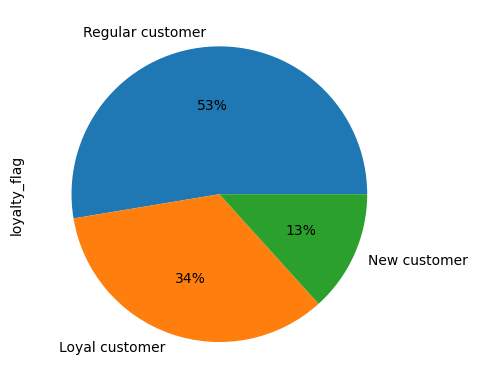

In [10]:
# Creating a pie chart for customer loyalty
pie_loyalty = final_dataset['loyalty_flag'].value_counts().plot.pie(labels=['Regular customer', 'Loyal customer', 'New customer'], autopct=('%1.f%%'))

In [11]:
final_dataset['loyalty_flag'].value_counts(dropna = False)

Regular customer    15876776
Loyal customer      10284093
New customer         4010555
Name: loyalty_flag, dtype: int64

In [12]:
# Exporting Pie Chart
pie_loyalty.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_loyalty.png'))

### Loyalty vs Departments

In [13]:
# Loyalty vs Departments Crosstab
ct_loyalty_orders = pd.crosstab(final_dataset['department'], final_dataset['loyalty_flag'], dropna = False)

In [14]:
ct_loyalty_orders

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,38723,23575,77275
babies,167108,39382,196576
bakery,379873,143764,568851
beverages,855017,331989,1320235
breakfast,221577,88748,343094
bulk,13834,3539,15468
canned goods,294594,150163,537284
dairy eggs,1830707,626314,2596419
deli,324046,132551,521453


In [15]:
ct_loyalty_frequency = pd.crosstab(final_dataset['frequency_flag'], final_dataset['loyalty_flag'], dropna = False)

In [16]:
ct_loyalty_frequency

loyalty_flag,Loyal customer,New customer,Regular customer
frequency_flag,,,
Frequent Customer,10279960,1098341,9631222
Non-frequent Customer,0,1596516,911475
Regular customer,4133,1315698,5334079


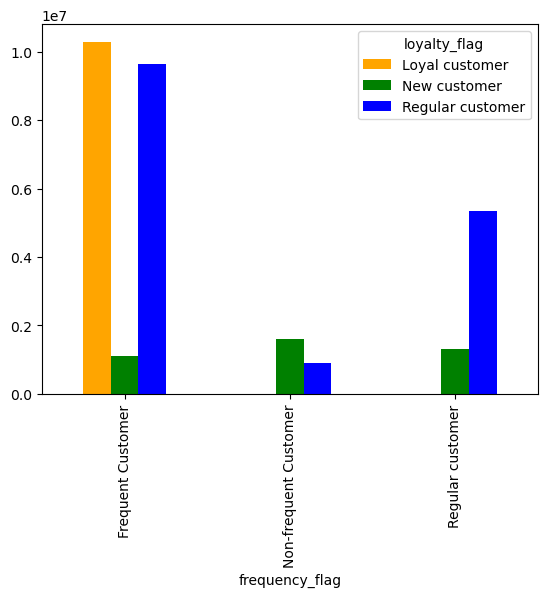

In [17]:
bar_loyalty_frequency = ct_loyalty_frequency.plot.bar(color = ['orange', 'green', 'blue'])

In [18]:
# Exporting Bar Chart
bar_loyalty_frequency.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_frequency.png'))